# **Analysis Based on Globlal Terrorism Database**

by Yiwei Song and Jiawei Feng

# SECTION 1: INTRODUCTION

Several months ago, we noticed a news that a terrorist organization caarried out an attack against Chinese teachers in Balchositan. Therefore, we want to know more about terrorist organizations and finally find a dataset called Global Terrorism Databse. It contains all the recorded terrorist attacks from 1970 to 2017.
The database has 135 variables and more than 180000 rows. We don't need all of the variables because some of them are irrelevet to our descriptive analysis. We will narrow down and pick out the varibales that are helpful.

### Data Dictionary
Here we showed variables after cleaning.

| Variables | Meaning               | Data Type | Key |
|-------------|---------------------------------------|--------------|--------|
|   Date  | The time that attack happend  | datetime  |1970-07-02
|Year     |The specific year that attack happend| int64  |1970
|Month    |The specific month that attack happend| int64  |7
|Day     |The specific day that attack happend | int64  |2
|country_name|The country or location where the incident occurred |object|Mexico
|region_area |The region in which the incident occurred,like North America or East Asia| object |North America
|provstate  | The name of the 1st order subnational administrative region in which the event occurs|  object |Federal
|city  |the name of the city, village, or town in which the incident occurred |object|Athens
|success | define a successful attack represented by 1 and a unsuccessful attack represented by 0| int64|1
|suicide|the perpetrator did not intend to escape from the attack alive if it's 1, otherwise is 0| int64|0
|attacktype| the general method of attack |object|Assassination
|weaptype| the general type of weapon used in the incident| object|Explosives
|targtype|the general type of target,like business or government| object|Government
|target|the specific person, building, installation, etc., that was targeted| object|Employee
|natlty| the nationality of the target that was attacked|object|Belgium
|nkill| the number of total confirmed fatalities for the incident|float64|1
|nwound|the number of confirmed non‐fatal injuries to both perpetrators and victims.|float64|3
|gname|the name of the group that carried out the attack|object|MANO-D



### Reference:
Data Set: https://www.kaggle.com/START-UMD/gtd

www.geeksforgeeks.org

www.stackoverflow.com

# SECTION 2: RESEARCH QUESTIONS

1. Does the terrorists prefer to carry out attacks in any specific day or month?

2. How does terrorists attack? What kind of weapon do they use?

3. What kind of targe do terrorists mostly choose?

4. Which countries are being attacked most frequently? 

5. Why terrorist attacks happend in those countries?

In [43]:
### import all the library and package we gonna use
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
!pip install squarify
import squarify
import plotly.express as px
import plotly.io as pio
from google.colab import drive

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [44]:
# connect to google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
gtd=pd.read_csv('/content/drive/MyDrive/globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')
gtd.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning:

Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.



,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


# SECTION 3: DATA CLEANING

Take a first look at our dataset,find out the structure.


In [46]:
### check if  data is loading as expected
gtd.head(20)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
5,197001010002,1970,1,1,NaN,0,NaN,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
6,197001020001,1970,1,2,NaN,0,NaN,218,Uruguay,3,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
7,197001020002,1970,1,2,NaN,0,NaN,217,United States,1,...,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN
8,197001020003,1970,1,2,NaN,0,NaN,217,United States,1,...,The New Years Gang issue a communiqué to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN
9,197001030001,1970,1,3,NaN,0,NaN,217,United States,1,...,"Karl Armstrong's girlfriend, Lynn Schultz, dro...",Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0,0,0,0,NaN


In [47]:
gtd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [48]:
### get the rows and columns of the data
gtd.shape

(181691, 135)

Check how much missing values in the dataset

In [49]:
### get the percentage of missing data fro each column
gtd.isna().mean()*100

eventid        0.000000
iyear          0.000000
imonth         0.000000
iday           0.000000
approxdate    94.914993
                ...    
INT_LOG        0.000000
INT_IDEO       0.000000
INT_MISC       0.000000
INT_ANY        0.000000
related       86.219461
Length: 135, dtype: float64

We can see that the date is seperated and we need a complete date for further analyze.

In [50]:
### change the column name to meet the to_datetime method's requirements
gtd.rename(columns={'iyear':'year','imonth':'month','iday':'day'},inplace=True)
gtd.head()

,eventid,year,month,day,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [51]:
### create a new column 'Date' to hold the complete date 
gtd['Date']=pd.to_datetime(gtd[['year','month','day']],errors='coerce')
gtd.head()

,eventid,year,month,day,approxdate,extended,resolution,country,country_txt,region,...,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,Date
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,PGIS,0,0,0,0,NaN,1970-07-02
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,PGIS,0,1,1,1,NaN,NaT
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN,NaT
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN,NaT
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN,NaT


Since there are 135 columns in the dataset and we only need some of them, so we change the column name to a easy understand way and select the columns that we want into a dataframe 

In [52]:
### rename certain column name for better understanding
gtd.rename(columns={'country_txt':'country_name','region_txt':'region_area','attacktype1_txt':'attacktype','target1':'target','targtype1_txt':'targtype','natlty1_txt':'natlty','weaptype1_txt':'weaptype'},inplace=True)

In [53]:
### Select the columns we want into a new dataframe 'gtd_data'
gtd_data=gtd[['Date', 'year', 'month', 'day','country_name','region_area','provstate', 'city', 'success', 'suicide','attacktype', 'weaptype','targtype','target','natlty','nkill', 'nwound', 'gname','motive']]
gtd_data.head()

,Date,year,month,day,country_name,region_area,provstate,city,success,suicide,attacktype,weaptype,targtype,target,natlty,nkill,nwound,gname,motive
0,1970-07-02,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,1,0,Assassination,Unknown,Private Citizens & Property,Julio Guzman,Dominican Republic,1.0,0.0,MANO-D,NaN
1,NaT,1970,0,0,Mexico,North America,Federal,Mexico city,1,0,Hostage Taking (Kidnapping),Unknown,Government (Diplomatic),"Nadine Chaval, daughter",Belgium,0.0,0.0,23rd of September Communist League,NaN
2,NaT,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,1,0,Assassination,Unknown,Journalists & Media,Employee,United States,1.0,0.0,Unknown,NaN
3,NaT,1970,1,0,Greece,Western Europe,Attica,Athens,1,0,Bombing/Explosion,Explosives,Government (Diplomatic),U.S. Embassy,United States,NaN,NaN,Unknown,NaN
4,NaT,1970,1,0,Japan,East Asia,Fukouka,Fukouka,1,0,Facility/Infrastructure Attack,Incendiary,Government (Diplomatic),U.S. Consulate,United States,NaN,NaN,Unknown,NaN


In [54]:
### check data types of new dataset. 
gtd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Date          180800 non-null  datetime64[ns]
 1   year          181691 non-null  int64         
 2   month         181691 non-null  int64         
 3   day           181691 non-null  int64         
 4   country_name  181691 non-null  object        
 5   region_area   181691 non-null  object        
 6   provstate     181270 non-null  object        
 7   city          181257 non-null  object        
 8   success       181691 non-null  int64         
 9   suicide       181691 non-null  int64         
 10  attacktype    181691 non-null  object        
 11  weaptype      181691 non-null  object        
 12  targtype      181691 non-null  object        
 13  target        181055 non-null  object        
 14  natlty        180132 non-null  object        
 15  nkill         171

In [55]:
### check if there is any mistake with our new dataset. 
gtd_data.isna().mean()*100

Date             0.490393
year             0.000000
month            0.000000
day              0.000000
country_name     0.000000
region_area      0.000000
provstate        0.231712
city             0.238867
success          0.000000
suicide          0.000000
attacktype       0.000000
weaptype         0.000000
targtype         0.000000
target           0.350045
natlty           0.858050
nkill            5.676120
nwound           8.977330
gname            0.000000
motive          72.171984
dtype: float64

In [56]:
### Since feature motive has more than 50% Na values, we better drop it.
gtd_data=gtd_data.drop(['motive'],axis=1)


In [57]:
### Since nkill and nwound have less than 10% Na values, we will fill with mean value.
gtd_data.nkill=gtd_data.nkill.fillna(gtd_data.nkill.mean())
gtd_data.nwound=gtd_data.nwound.fillna(gtd_data.nwound.mean())


In [58]:
### Check the column values after clenning
gtd_data.isna().mean()*100

Date            0.490393
year            0.000000
month           0.000000
day             0.000000
country_name    0.000000
region_area     0.000000
provstate       0.231712
city            0.238867
success         0.000000
suicide         0.000000
attacktype      0.000000
weaptype        0.000000
targtype        0.000000
target          0.350045
natlty          0.858050
nkill           0.000000
nwound          0.000000
gname           0.000000
dtype: float64

# SECTION 4: VISUALIZATION ANALYSIS

## Overall Descriptive Statistic

We are using describe() method to get the big picture of the dataset we create, such as mean, standard deviation, min and max.

In [59]:
### get descriptive statistics for our dataframe
gtd_data.describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
year,181691.0,2002.6,13.3,1970.0,1991.0,2009.0,2014.0,2017.0
month,181691.0,6.5,3.4,0.0,4.0,6.0,9.0,12.0
day,181691.0,15.5,8.8,0.0,8.0,15.0,23.0,31.0
success,181691.0,0.9,0.3,0.0,1.0,1.0,1.0,1.0
suicide,181691.0,0.0,0.2,0.0,0.0,0.0,0.0,1.0
nkill,181691.0,2.4,11.2,0.0,0.0,1.0,2.0,1570.0
nwound,181691.0,3.2,34.3,0.0,0.0,0.0,3.0,8191.0


According to the result, we can see that the effective data is nkill and nwound, we found out that the maximum killed in an incident is 1570, and the maximum wounded in an incident is 8191. We could find any more insights from the reuslt, therefore, we need further analyze with visualizations.

The number of attacks based on timeline

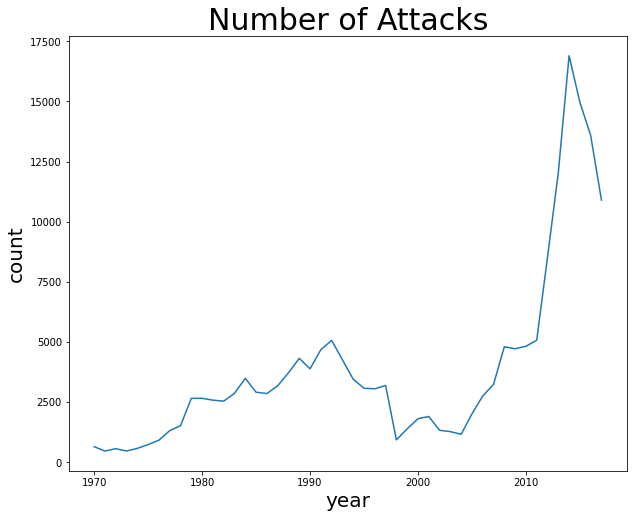

In [60]:
### get a line chart of the attack number based on time
temp= gtd_data['year'].value_counts().sort_index()
s=temp.plot.line(figsize=(10,8))
s.set_title('Number of Attacks',fontsize=30)
s.set_xlabel('year',fontsize=20)
s.set_ylabel('count',fontsize=20)
s;

The graph shows that the number of recorded terrorist attacks worldwide is divided into three phases. From 1970 to 1992, the number of terrorist attacks was on the rise, climbing from 651 cases in 1970 to 5071 cases in 1992, and from 1992 to 2004, the number of cases was on a downward trend. From 2004 onward, the number of cases has exploded exponentially. In just 10 years, the number of terrorist attacks worldwide has increased more than tenfold.



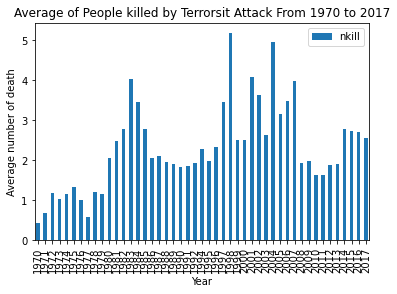

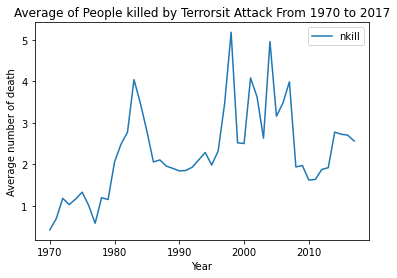

In [61]:
### a bar chart to show how many people were killed every year due to terrorist attack
killed_per_year_bar=gtd_data[['year','nkill']].groupby(['year']).mean().plot.bar(title='Average of People killed by Terrorsit Attack From 1970 to 2017',
                                                             xlabel='Year', ylabel='Average number of death');
killed_per_year_line=gtd_data[['year','nkill']].groupby(['year']).mean().plot.line(title='Average of People killed by Terrorsit Attack From 1970 to 2017',
                                                             xlabel='Year', ylabel='Average number of death');
killed_per_year_bar;
killed_per_year_line;


From these two graphs we could see that the average death casued by terrorist attack is gradually growing since 1970. And it reach the top around 2000. After 2000, the number goes down.

The governments around the world might take terrorism seriously after year 2000 and take actions to prevent damages from terrorist organiztion.

## Question 1: Does the terrorists prefer to carry out attacks in any specific day or month?



In [62]:
### get all the number of attacks of different month
temp_1=gtd_data[gtd_data.month != 0]
temp_1=temp_1['month'].value_counts()
temp_1

5     16875
7     16268
8     15800
10    15563
6     15359
3     15257
4     15152
1     14936
11    14906
9     14180
2     13879
12    13496
Name: month, dtype: int64

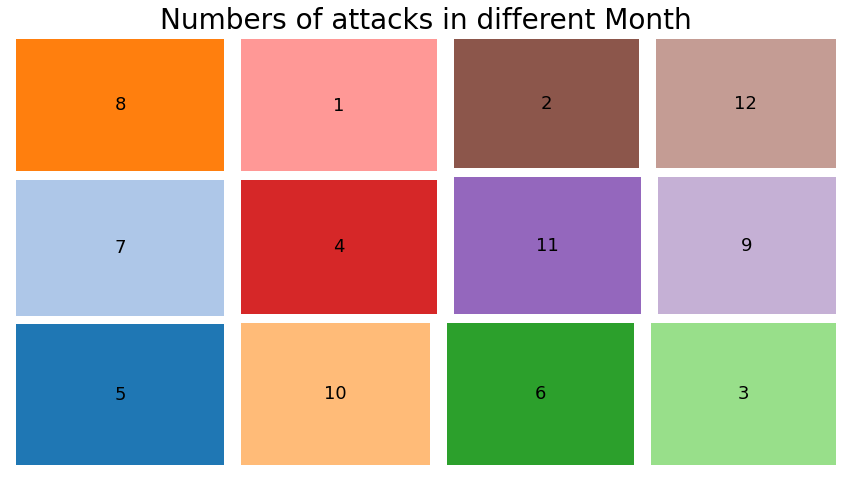

In [63]:
### a plot to show the attacks number for different months
plt.figure(figsize=(15, 8))
plt.axis("off")
v=squarify.plot(sizes=temp_1,label=temp_1.index,color=sns.color_palette("tab20", len(temp_1)),text_kwargs={'fontsize': 18},pad=1)
v.set_title("Numbers of attacks in different Month", fontsize=28);

In [64]:
###  get all the number of attacks of different days in a month
temp_2=gtd_data[gtd_data['day']!=0]
temp_2=temp_2['day'].value_counts()
temp_2

15    6500
1     6344
4     6153
16    6112
10    6064
9     6057
13    6043
14    6028
28    6027
12    6012
3     6011
7     5997
19    5973
2     5954
27    5937
11    5936
20    5930
18    5880
25    5875
8     5859
17    5852
5     5844
21    5827
26    5823
22    5799
23    5782
6     5781
24    5752
29    5507
30    5046
31    3095
Name: day, dtype: int64

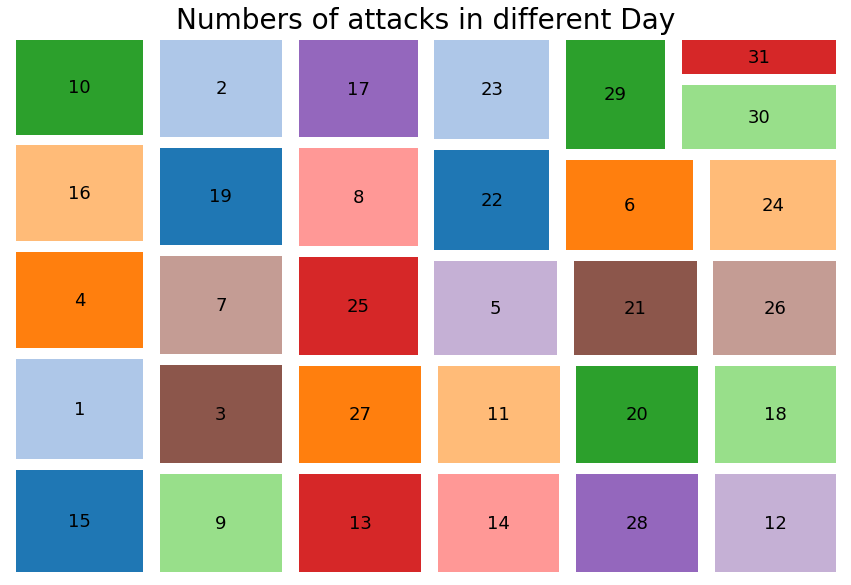

In [65]:
### a plot to show the attacks number for different days in a month
plt.figure(figsize=(15, 10))
plt.axis("off")
v=squarify.plot(sizes=temp_2,label=temp_2.index,color=sns.color_palette("tab20", len(temp_1)),text_kwargs={'fontsize': 18},pad=1)
v.set_title("Numbers of attacks in different Day", fontsize=28);

The graph above shows the percentage of all times a terrorist attack occurred for each month and for each specific day. The larger the area of the rectangle, the larger the percentage of terrorist attacks that occurred in that month/day of the total sample. As can be seen, the frequency of terrorist attacks is essentially the same for each month, as well as from each day of each specific month. Maybe terrorists don't like carry out attack at the end of month. This suggests that terrorist attacks can occur at any time and that terrorists do not have a preference for launching attacks on a specific day.



## Question 2: How does terrorists attack? What kind of weapon do they use?

We could find out what are the most used attack types and weapons that terrorists used.

In [66]:
### get the top 5 attack types
temp_3=gtd_data['attacktype'].value_counts().sort_values(ascending=True)[-5:]
temp_3=(temp_3/len(gtd_data.index)).round(3)
temp_3

Facility/Infrastructure Attack    0.057
Hostage Taking (Kidnapping)       0.061
Assassination                     0.106
Armed Assault                     0.235
Bombing/Explosion                 0.486
Name: attacktype, dtype: float64

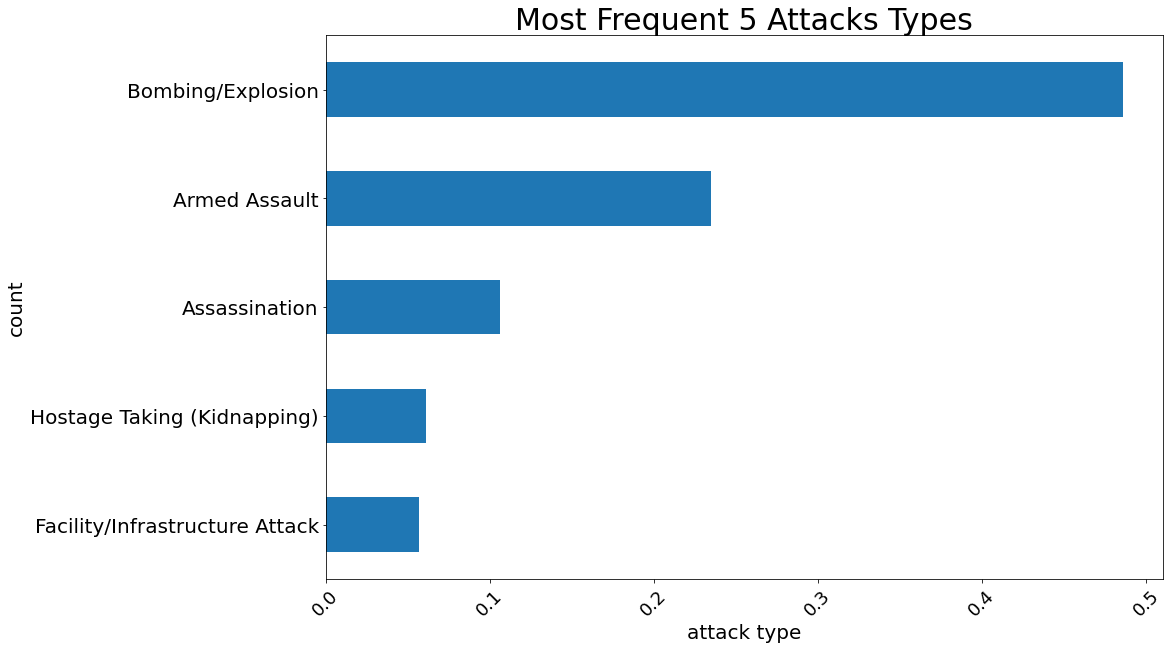

In [67]:
###  a bar chart to show the top 5 attack types
a=temp_3.plot.barh(figsize=(15,10))
plt.xticks(rotation = 45)
a.set_title('Most Frequent 5 Attacks Types',fontsize=30)
a.set_xlabel('attack type',fontsize=20)
a.set_ylabel('count',fontsize=20)
a.tick_params(axis='x', labelsize=18)
a.tick_params(axis='y', labelsize=20)
a;

In [68]:
### get the top 5 weapon types
temp_4=gtd_data['weaptype'].value_counts().sort_values(ascending=True)[-5:]
temp_4=(temp_4/len(gtd_data.index)).round(2)
temp_4

Melee         0.02
Incendiary    0.06
Unknown       0.08
Firearms      0.32
Explosives    0.51
Name: weaptype, dtype: float64

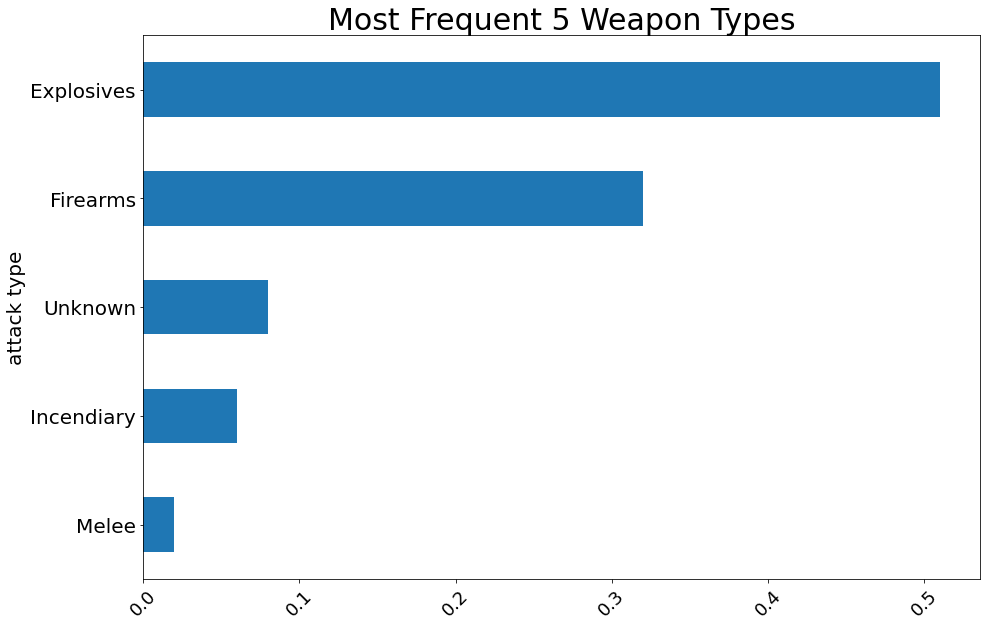

In [69]:
### a bar chart to show the top 5 weapon types
b=temp_4.plot.barh(figsize=(15,10))
plt.xticks(rotation = 45)
b.set_title('Most Frequent 5 Weapon Types',fontsize=30)
b.set_ylabel('attack type',fontsize=20)
b.tick_params(axis='x', labelsize=18)
b.tick_params(axis='y', labelsize=20)
b;

In terms of attack methods and weapons used, the most frequent method of attack used by terrorist attackers is bomb attacks, and the most used weapons are also bombs and explosive items. More than 50% of terrorists use bombs as a criminal weapon, and more than 30% use firearms.

## Question 3: What kind of targe do terrorists mostly choose?


We are going to find out the top 5 target types that terrorists choose to attack.

In [70]:
### get the top 5 target types
N = 5
topN = gtd_data['targtype'].value_counts()[:N].index
topN

Index(['Private Citizens & Property', 'Military', 'Police',
       'Government (General)', 'Business'],
      dtype='object')

In [71]:
### only keep the top 5 target types and alter rest types to 'other'
gtd_data_copy=gtd_data.copy()
gtd_data_copy.targtype  = pd.Series(np.where(gtd_data['targtype'].isin(topN), gtd_data['targtype'], 'other'))
gtd_data_copy.targtype.unique()

array(['Private Citizens & Property', 'other', 'Police', 'Military',
       'Government (General)', 'Business'], dtype=object)

In [72]:
### get the ratio of top 5 target types and other
temp_5=gtd_data_copy['targtype'].value_counts()
temp_5=(temp_5/len(gtd_data_copy.index)).round(3)
temp_5

other                          0.241
Private Citizens & Property    0.239
Military                       0.154
Police                         0.135
Government (General)           0.117
Business                       0.114
Name: targtype, dtype: float64

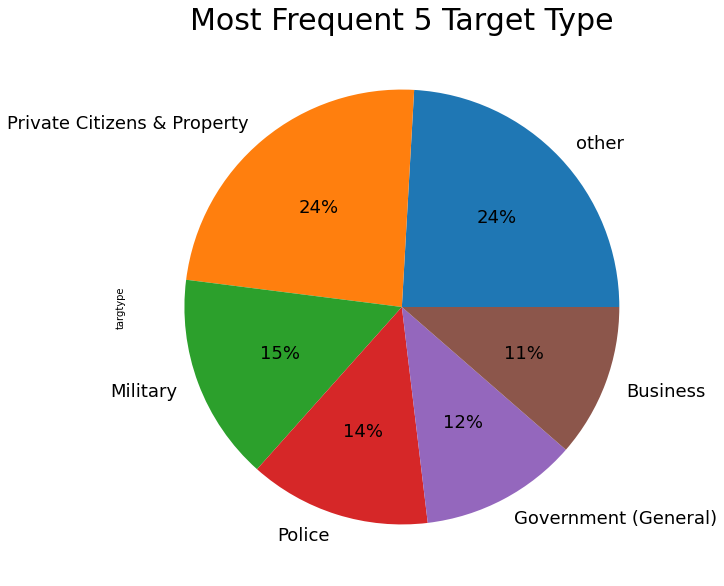

In [73]:
### a bar chart to show the ratio of 5 top target types and other
c=temp_5.plot(kind='pie',autopct='%1.0f%%',figsize=(15,10),textprops={'fontsize': 18})
c.set_title('Most Frequent 5 Target Type',fontsize=30)
c;


In terms of attack methods and weapons used, the most frequent method of attack used by terrorist attackers is bomb attacks, and the most used weapons are also bombs and explosive items. More than 50 percent of terrorists use bombs as a weapon of crime, and more than 30 percent use firearms and other firearms.

In terms of targets, terrorists targeted civilians most frequently, followed by military, police, and government agencies. Terrorist attacks against civilians are easier to achieve, leading to a preference for terrorists to attack civilians. This also makes terror attacks difficult to prevent because terrorists can attack from any corner of society.

## Question 4: Which countries are attacked most frequently? 


In [74]:
temp_6=gtd_data_copy['natlty'].value_counts().sort_values(ascending=True)[-10:]
temp_6=(temp_6/len(gtd_data_copy.index)).round(3)
temp_6

Turkey           0.026
United States    0.028
El Salvador      0.029
Peru             0.032
Philippines      0.037
Colombia         0.044
Afghanistan      0.060
India            0.067
Pakistan         0.077
Iraq             0.133
Name: natlty, dtype: float64

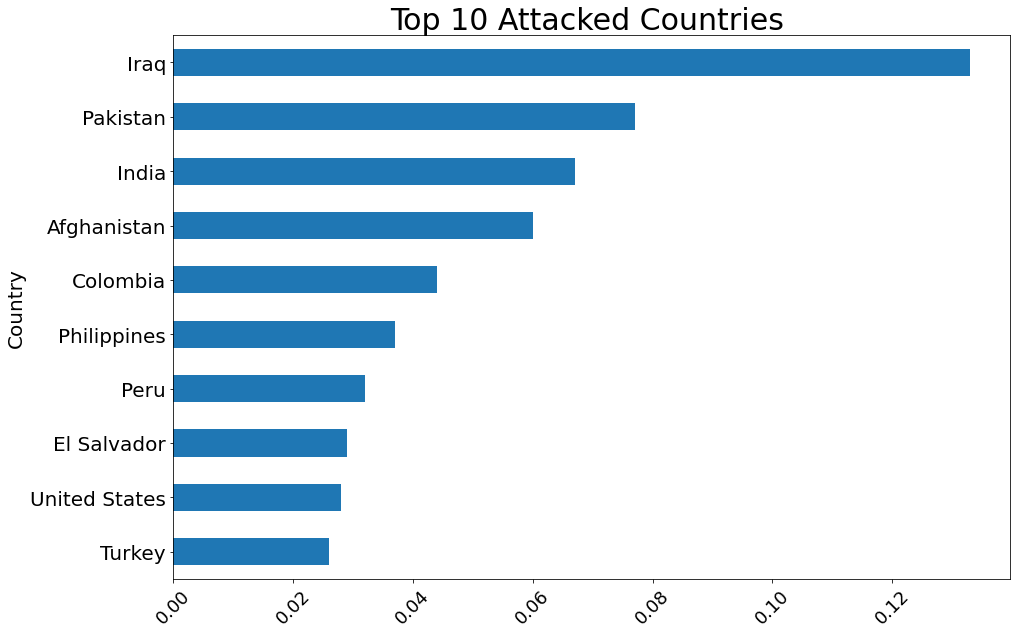

In [75]:
d=temp_6.plot.barh(figsize=(15,10))
plt.xticks(rotation = 45)
d.set_title('Top 10 Attacked Countries ',fontsize=30)
d.set_ylabel('Country',fontsize=20)

d.tick_params(axis='x', labelsize=18)
d.tick_params(axis='y', labelsize=20)
d;


In terms of countries targeted, Iraq is undoubtedly the most affected country. The United States, on the other hand, is ranked 9th.



## Question 5: Why terrorist attacks happend in those countries?

In order to find out the reason that that why those countries are the most attaced region, we are going to make a geographical plot and to see what we might discover.

In [76]:
### keep the graph showing in the colab notebook
pio.renderers.default = "colab"

In [77]:
### get the number of attacks of different country and keep them in a dictionary
count_dict = {d:(gtd_data['country_name']==d).sum() for d in gtd_data.country_name.unique()}
count_dict

{'Dominican Republic': 90,
 'Mexico': 524,
 'Philippines': 6908,
 'Greece': 1275,
 'Japan': 402,
 'United States': 2836,
 'Uruguay': 82,
 'Italy': 1565,
 'East Germany (GDR)': 38,
 'Ethiopia': 190,
 'Guatemala': 2050,
 'Venezuela': 293,
 'West Germany (FRG)': 541,
 'Switzerland': 111,
 'Jordan': 113,
 'Spain': 3249,
 'Brazil': 273,
 'Egypt': 2479,
 'Argentina': 815,
 'Lebanon': 2478,
 'Ireland': 307,
 'Turkey': 4292,
 'Paraguay': 114,
 'Iran': 684,
 'United Kingdom': 5235,
 'Colombia': 8306,
 'Bolivia': 314,
 'Nicaragua': 1970,
 'Netherlands': 130,
 'Belgium': 154,
 'Canada': 96,
 'Australia': 114,
 'Pakistan': 14368,
 'Zambia': 62,
 'Sweden': 132,
 'Costa Rica': 67,
 'South Yemen': 2,
 'Cambodia': 259,
 'Israel': 2183,
 'Poland': 39,
 'Taiwan': 50,
 'Panama': 127,
 'Kuwait': 76,
 'West Bank and Gaza Strip': 2227,
 'Austria': 115,
 'Czechoslovakia': 10,
 'India': 11960,
 'France': 2693,
 'South Vietnam': 1,
 'Brunei': 6,
 'Zaire': 50,
 "People's Republic of the Congo": 4,
 'Portugal': 

In [78]:
### convert the dictionary above to a dataframe and prepare to merge with the gtd_data dataset
count_dict_df = pd.DataFrame(count_dict,index=[0]).T.reset_index()
count_dict_df


,index,0
0,Dominican Republic,90
1,Mexico,524
2,Philippines,6908
3,Greece,1275
4,Japan,402
...,...,...
200,Turkmenistan,2
201,Serbia-Montenegro,11
202,Bhutan,6
203,Serbia,12


In [79]:
### set the column names of the new dataframe
count_dict_df.columns=['country_name', 'count']
count_dict_df

,country_name,count
0,Dominican Republic,90
1,Mexico,524
2,Philippines,6908
3,Greece,1275
4,Japan,402
...,...,...
200,Turkmenistan,2
201,Serbia-Montenegro,11
202,Bhutan,6
203,Serbia,12


In [80]:
### merge the count_dict_df with gtd_data inorder to draw a geographical plot
df=pd.merge(gtd_data, count_dict_df, how='left', on='country_name')
df['count']

0            90
1           524
2          6908
3          1275
4           402
          ...  
181686     4142
181687     2201
181688     6908
181689    11960
181690     6908
Name: count, Length: 181691, dtype: int64

In [81]:
### set the geographical plot parameters
fig = px.choropleth(df,color=df['count'],locations=df['country_name'],locationmode="country names", color_continuous_scale="Reds",range_color=(0, 25000))
 

In [82]:
fig.show()

We can see from the plot that Pakistan, Afghanistan and India are the most attacked countries beside Iraq. And these three countries are border together. This should be a reason of terrorist attacks.

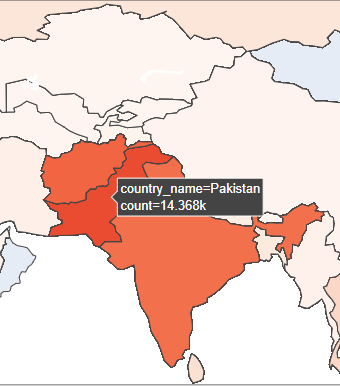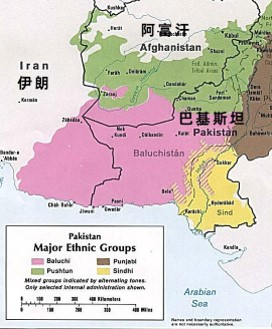

We found a image on the Internet that shows the major ethnic groups distribution in Iran, Afghanistan and Pakistan. By comparing the graph we generated from our dataset and the image we found on the internet, it's clear that the border of the nation is different from the boarder of Ethnic groups. People who live in the 3 countries are actually in different ethnic and have have different culture, religon and backgroud. People with different ethnic always want to be together and hope to have their own country. Therefore they fight against the local governemnt and carry out terrorist attacks to shake up government's rule. That's one of the reason for why most terrorists attacks happend in these 3 countries.

## SECTION 5:NEXT STEPS

Based on my analytical questions, a natural next step is analyze why terror attacks happend in other region arond the world.

In addition,we could conduct additional analyse using other features of the dataset and continue exploring the insights of the dataset. Questions like:

1. How can we tell if the attackers are terrorist organization but not individual or other organizations in the dataset.

2. Is there any method that might could predict a terror attack ?

The above questions might require additional data that is currently unavailable to us, and we also need modeling techniques and machine learning knowleadge 
to conduct the research.


## SECTION 6: WRAP UP - LESSONS LEARNED AND TECHNICAL CHALLENGES

**Lessons Learned**:

1. We learned effective approaches to deal with great-amouont-rows dataset effectively. Now we could use pandas and numpy to manapulate dataset as we want. And it's actually more effective than Excel.

2. We learned that cleaning data takes a lot of time and it really requires patience and carefulness. 

3. Logic is the most important thing in coding. Similarly, a story is the most important thing of presentation. A great stroy is based on great questions. We need to keep modifying our questions before acutal coding. As the questions are answered one by one, the story will gradually show itself.

4. Visualizations are critical to the stroytelling. However, We need to consider when do we need visualizatiions and in what form should we present. This will make the presentation clean and accurate.

**Technical Challenges**

1. We googled a lot when trying to complete a part. There are always suprising errors, like type issue, forget sytanx of method or function. It cost us a lot of time but we finally figured it out. Just like Prof. Tao said to us, the best way to learn a language is to use it more frequently. We still need to work on more projects to practice our coding skills.

2. The geopgraphcial plot is another technical challenge for us. We googled a lot and tried various methods and finally got it work. The issue is it's hard to match the country name or region name between the raw data and the library requirment. We need to be perfect match to show the plot.
